In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [16]:
df = pd.read_csv("D:\labs\data_set\TSA_week_wise_sales_25_01_24.csv")
df

,week,Sales
0,1,10618.1
1,2,10537.9
2,3,10209.3
3,4,10553.0
4,5,9934.9
...,...,...
115,116,10650.0
116,117,10741.6
117,118,10246.0
118,119,10354.4


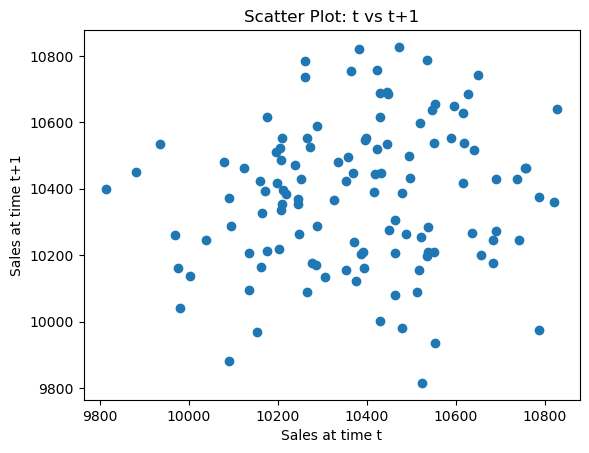

In [18]:
plt.scatter(df['Sales'][:-1], df['Sales'][1:])
plt.title('Scatter Plot: t vs t+1')
plt.xlabel('Sales at time t')
plt.ylabel('Sales at time t+1')
plt.show()

In [10]:
df2 = pd.read_csv("D:\labs\data_set\Chemical Process Viscosity.csv")
df2

,Time Period,Reading
0,1,86.7418
1,2,85.3195
2,3,84.7355
3,4,85.1113
4,5,85.1487
...,...,...
95,96,85.7609
96,97,85.2302
97,98,86.7312
98,99,87.0048


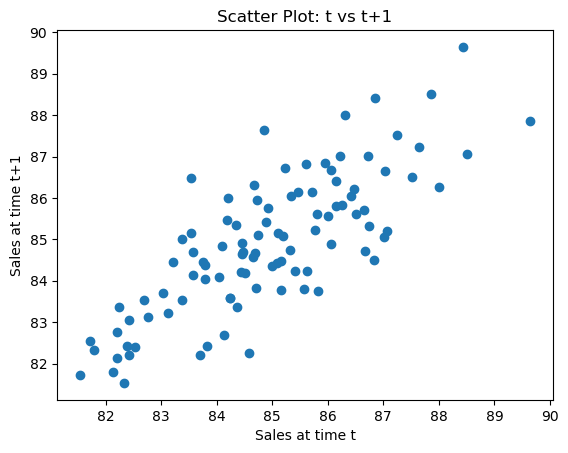

In [20]:
plt.scatter(df2['Reading'][:-1], df2['Reading'][1:])
plt.title('Scatter Plot: t vs t+1')
plt.xlabel('Sales at time t')
plt.ylabel('Sales at time t+1')
plt.show()

In [28]:
# Calculate c0 and c1
n = len(df)
c0 = np.sum(df['Sales']) / n
c1 = 2 * np.sum(df['Sales'] * np.cos(2 * np.pi * df['week'] / n)) / n

print(f"c0 = {c0:.2f}")
print(f"c1 = {c1:.2f}")

c0 = 10379.13
c1 = 23.69


In [31]:
# Calculate c0 and c1
n2 = len(df2)
c02 = np.sum(df2['Reading']) / n
c12 = 2 * np.sum(df2['Reading'] * np.cos(2 * np.pi * df2['Time Period'] / n)) / n

print(f"c0 = {c02:.2f}")
print(f"c1 = {c12:.2f}")

c0 = 70.76
c1 = -23.74


In [34]:
mean_y = np.mean(df['Sales'])
covariance = np.sum((np.array(df["Sales"]) - mean_y) * (np.array(df["week"]) - mean_y)) / (len(df["Sales"]) - 1)

mean_y, covariance


(10379.130000000001, 223.14285715328168)

In [35]:
mean_y = np.mean(df2['Reading'])
covariance = np.sum((np.array(df2["Reading"]) - mean_y) * (np.array(df2["Time Period"]) - mean_y)) / (len(df2["Reading"]) - 1)

mean_y, covariance


(84.915335, -16.471003535353585)

In [38]:
time_period = df2['Time Period'].values
reading = df2['Reading'].values

In [39]:
bar_x = np.mean(reading)
C_0 = np.mean((reading - bar_x)**2)

In [40]:
N = len(reading)
lags = np.arange(1, N)

In [48]:
C_k_values = np.zeros_like(lags, dtype=float)
lags_values = np.zeros_like(lags, dtype=int)

for i, k in enumerate(lags):
    lags_values[i] = k
    C_k_values[i] = np.mean((reading[:-k] - bar_x) * (reading[k:] - bar_x))

# Create a DataFrame for the results
result_table = pd.DataFrame({
    'Lag (k)': lags_values,
    'Autocovariance (C_k)': C_k_values
})

# Add C_0 to the table
c0_row = pd.DataFrame({'Lag (k)': [0], 'Autocovariance (C_k)': [C_0]})
result_table = pd.concat([c0_row, result_table], ignore_index=True)


# Display the results
print("Mean (bar_x):", bar_x)
print("C_0:", C_0)
print("\nAutocovariance Table:")
print(result_table)

Mean (bar_x): 84.915335
C_0: 2.809332232475002

Autocovariance Table:
    Lag (k)  Autocovariance (C_k)
0         0              2.809332
1         1              2.225391
2         2              1.800411
3         3              1.423735
4         4              1.061922
..      ...                   ...
95       95              0.357533
96       96              0.240260
97       97              1.378530
98       98              1.936836
99       99              0.259111

[100 rows x 2 columns]


In [54]:
autocovariance_table = pd.DataFrame({
    'Lag (k)': lags_values,
    'Autocovariance (C_k)': C_k_values
})

In [55]:
# Add C_0 to the autocovariance table
c0_row = pd.DataFrame({'Lag (k)': [0], 'Autocovariance (C_k)': [C_0]})
autocovariance_table = pd.concat([c0_row, autocovariance_table], ignore_index=True)

In [56]:
acf_values = autocovariance_table['Autocovariance (C_k)'] / C_0

# Create a DataFrame for the ACF results
acf_table = pd.DataFrame({
    'Lag (k)': autocovariance_table['Lag (k)'],
    'Autocorrelation (ACF_k)': acf_values
})

In [58]:
# Display the results
# print("Autocovariance Table:")
# print(autocovariance_table)

print("\nAutocorrelation Function (ACF) Table:")
print(acf_table)


Autocorrelation Function (ACF) Table:
    Lag (k)  Autocorrelation (ACF_k)
0         0                 1.000000
1         1                 0.792142
2         2                 0.640868
3         3                 0.506788
4         4                 0.377998
..      ...                      ...
95       95                 0.127266
96       96                 0.085522
97       97                 0.490697
98       98                 0.689429
99       99                 0.092232

[100 rows x 2 columns]


In [59]:
acf_table.to_csv('acf_results.csv', index=False)

C:\Users\kavan\AppData\Local\Temp\ipykernel_4036\1995940755.py:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(acf_table['Lag (k)'][:30], acf_table['Autocorrelation (ACF_k)'][:30], basefmt="k-", use_line_collection=True)


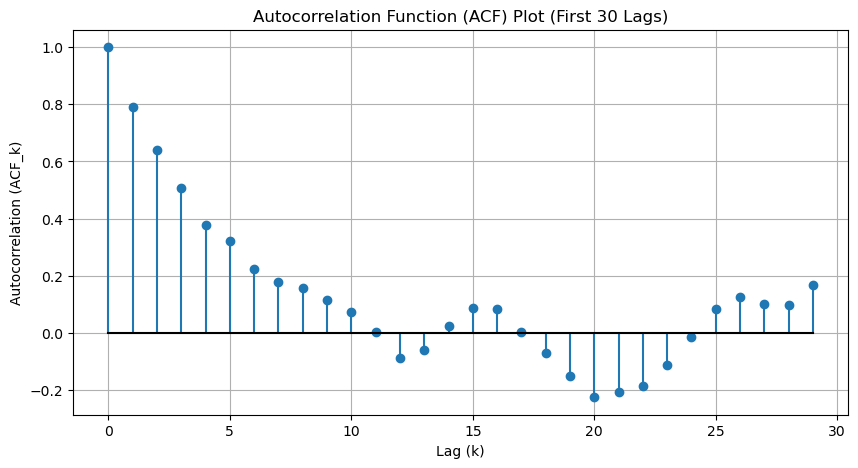

In [61]:
plt.figure(figsize=(10, 5))
plt.stem(acf_table['Lag (k)'][:30], acf_table['Autocorrelation (ACF_k)'][:30], basefmt="k-", use_line_collection=True)
plt.title('Autocorrelation Function (ACF) Plot (First 30 Lags)')
plt.xlabel('Lag (k)')
plt.ylabel('Autocorrelation (ACF_k)')
plt.grid(True)
plt.show()